In [1]:
# 向量化留言
from sentence_transformers import SentenceTransformer
from sklearn_extra.cluster import KMedoids
import numpy as np

# 分群
import hdbscan
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
input_file = 'youtube_multi_video_comments.csv'
df = pd.read_csv(input_file)
comments = df['text'].tolist()

embedding_model = SentenceTransformer("Qwen/Qwen3-Embedding-0.6B") # 基於 Cosine 相似度的模型
embeddings = embedding_model.encode(comments, show_progress_bar=True)

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

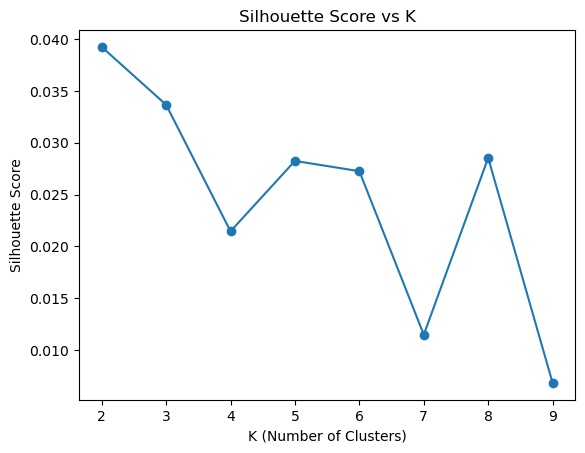

In [4]:
scores = []
K_range = range(2, 10)

for k in K_range:
    cluster_model = KMedoids(n_clusters=k, metric='cosine', random_state=42).fit(embeddings)
    labels = cluster_model.labels_
    score = silhouette_score(embeddings, labels, metric='cosine')
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K (Number of Clusters)")
plt.ylabel("Silhouette Score")
plt.show()

In [5]:
n_clusters = 2
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, metric='cosine')
labels = kmedoids.fit_predict(embeddings)

# 找出每群中心點的 index
medoid_indices = kmedoids.medoid_indices_

for idx in medoid_indices:
    print(f"群代表留言: {comments[idx]}")

群代表留言: 最大的問題、就是交通部！<br>該做的不做、遇到事情就想盡辦法卸責、並訂立違反公平公正公理的新制法規、造成更多的交通動亂、路權對立！
群代表留言: 不讓有想過後面車的反應嗎？<br>明明都有那麼多台車還要硬走<br>果然真的是行人地獄==


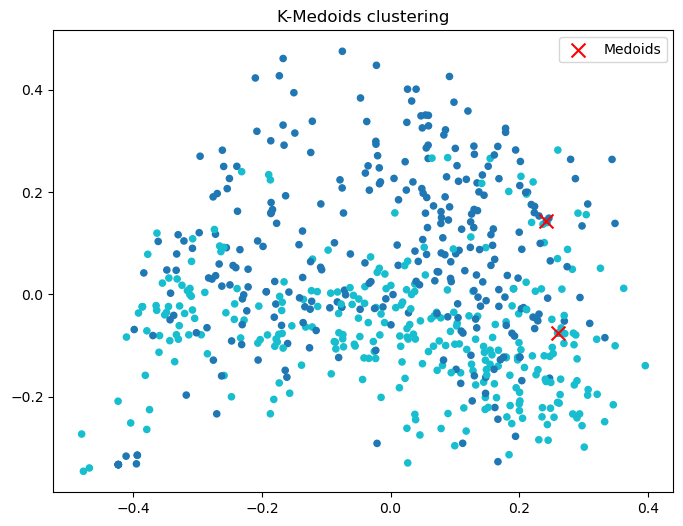

In [7]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="tab10", s=20)
plt.scatter(reduced[medoid_indices, 0], reduced[medoid_indices, 1], c='red', marker='x', s=100, label="Medoids")
plt.title("K-Medoids clustering")
plt.legend()
plt.show()